# Marketing Campaign Project

## Goal:
### Predict the amount that customers spend on Wine based on their features



### Basic Data Setups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('marketing_campaign.csv',sep='\t')

In [3]:
df = df.drop(['Z_CostContact','Z_Revenue'],axis=1)


In [4]:
df = df. drop(["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4",
               "AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases",
               "NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome", 
               "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], axis=1)

In [5]:
df = df.drop('ID',axis=1)

### EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year_Birth      2240 non-null   int64  
 1   Education       2240 non-null   object 
 2   Marital_Status  2240 non-null   object 
 3   Income          2216 non-null   float64
 4   Dt_Customer     2240 non-null   object 
 5   Recency         2240 non-null   int64  
 6   MntWines        2240 non-null   int64  
 7   Complain        2240 non-null   int64  
 8   Response        2240 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 157.6+ KB


In [7]:
df.describe()

,Year_Birth,Income,Recency,MntWines,Complain,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,49.109375,303.935714,0.009375,0.149107
std,11.984069,25173.076661,28.962453,336.597393,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,24.000000,23.750000,0.000000,0.000000
50%,1970.000000,51381.500000,49.000000,173.500000,0.000000,0.000000
75%,1977.000000,68522.000000,74.000000,504.250000,0.000000,0.000000
max,1996.000000,666666.000000,99.000000,1493.000000,1.000000,1.000000


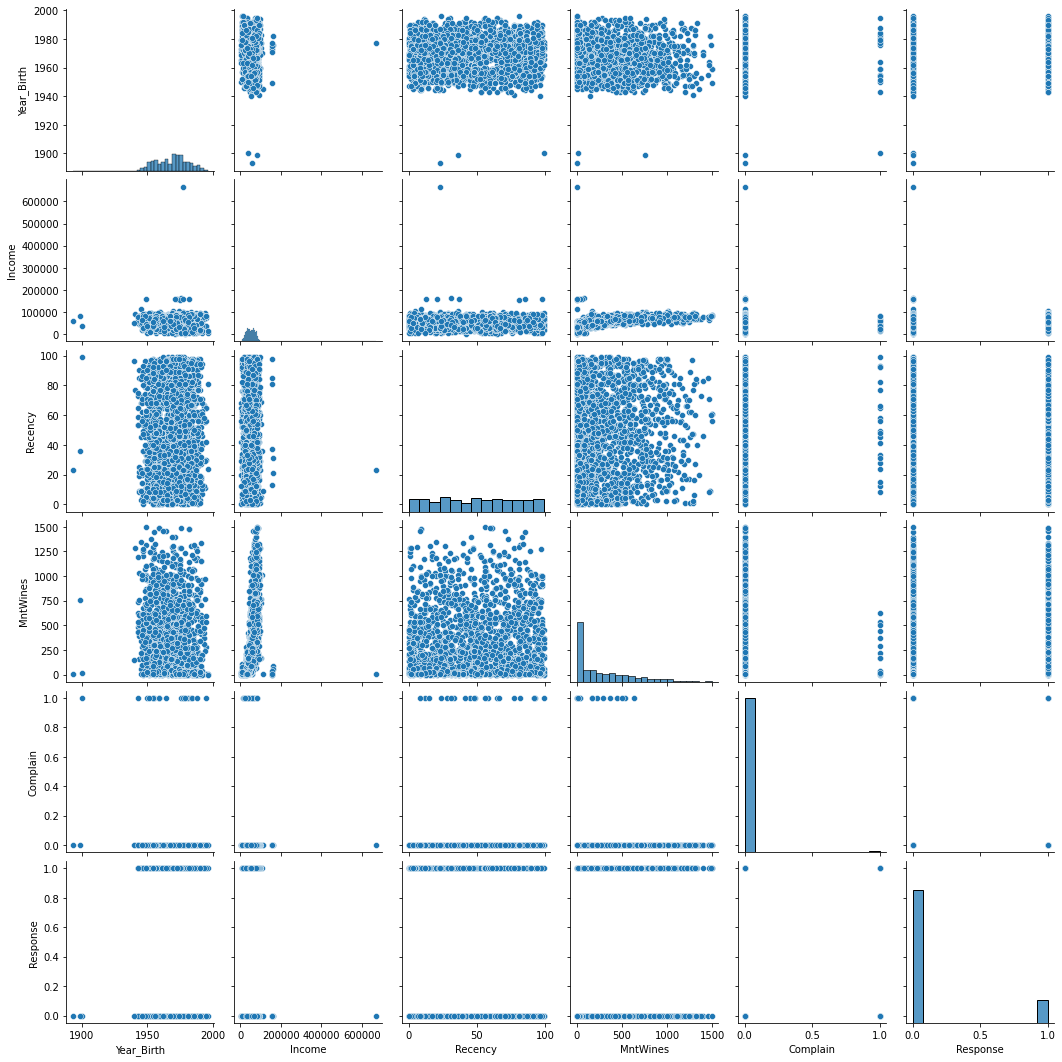

In [8]:
sns.pairplot(df)

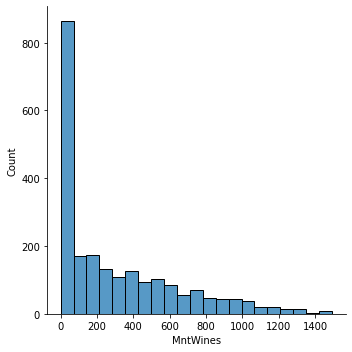

In [9]:
sns.displot(df,x='MntWines')

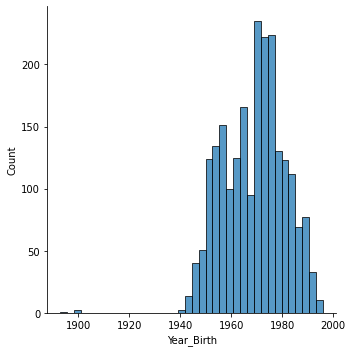

In [10]:
sns.displot(df,x='Year_Birth')

In [11]:
df['Age'] = df['Year_Birth'].apply(lambda x: -1*(x-datetime.date.today().year))

In [12]:
df = df.drop('Year_Birth',axis=1)

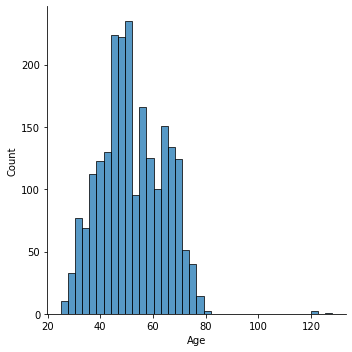

In [13]:
sns.displot(df,x='Age')

In [14]:
df.corr()

,Income,Recency,MntWines,Complain,Response,Age
Income,1.000000,-0.003970,0.578650,-0.027225,0.133047,0.161791
Recency,-0.003970,1.000000,0.016064,0.013231,-0.198437,0.019871
MntWines,0.578650,0.016064,1.000000,-0.039007,0.247254,0.157773
Complain,-0.027225,0.013231,-0.039007,1.000000,-0.001707,0.030128
Response,0.133047,-0.198437,0.247254,-0.001707,1.000000,-0.021325
Age,0.161791,0.019871,0.157773,0.030128,-0.021325,1.000000


<AxesSubplot:>

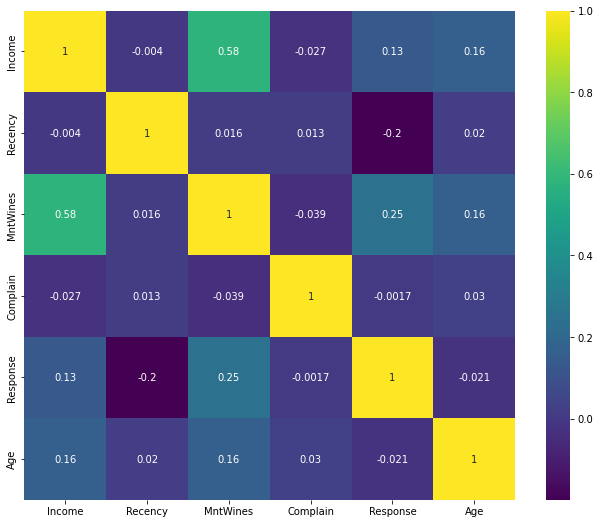

In [15]:
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<AxesSubplot:xlabel='MntWines', ylabel='Income'>

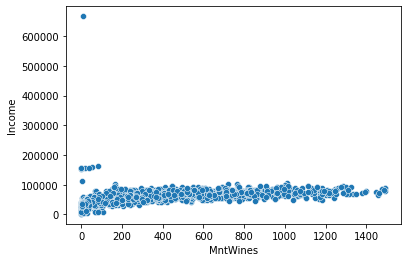

In [16]:
sns.scatterplot(x='MntWines',y='Income',data=df)

In [17]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,Complain,Response,Age
0,Graduation,Single,58138.0,04-09-2012,58,635,0,1,64
1,Graduation,Single,46344.0,08-03-2014,38,11,0,0,67
2,Graduation,Together,71613.0,21-08-2013,26,426,0,0,56
3,Graduation,Together,26646.0,10-02-2014,26,11,0,0,37
4,PhD,Married,58293.0,19-01-2014,94,173,0,0,40


<AxesSubplot:>

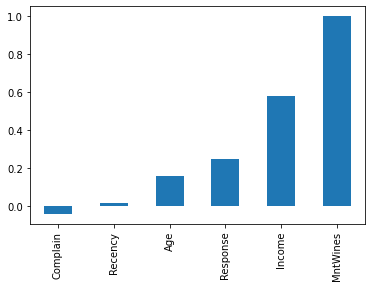

In [18]:
df.corr()['MntWines'].sort_values().plot(kind='bar')
#we can see that income is very correlated with the amount of wine you buy

<AxesSubplot:>

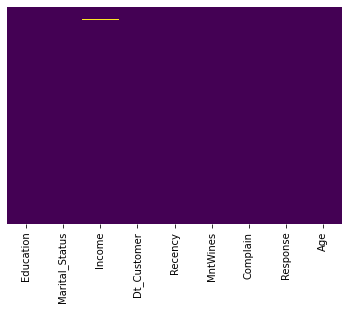

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#only one row of missing value, can drop

In [20]:
df = df.dropna()

In [21]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,Complain,Response,Age
0,Graduation,Single,58138.0,04-09-2012,58,635,0,1,64
1,Graduation,Single,46344.0,08-03-2014,38,11,0,0,67
2,Graduation,Together,71613.0,21-08-2013,26,426,0,0,56
3,Graduation,Together,26646.0,10-02-2014,26,11,0,0,37
4,PhD,Married,58293.0,19-01-2014,94,173,0,0,40


In [22]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [23]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [24]:
df['Marital_Status'].replace(to_replace=['YOLO','Absurd','Alone'],value='Single',inplace=True)

In [25]:
dummies = pd.get_dummies(df['Education'],drop_first=True)
df = df.drop(['Education'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [26]:
dummies = pd.get_dummies(df['Marital_Status'],drop_first=True)
df = df.drop(['Marital_Status'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [27]:
df['YearsEnrolled'] = df['Dt_Customer'].apply(lambda x: 2021-int(x[-4:]))

In [28]:
df = df.drop('Dt_Customer',axis=1)

In [29]:
df.head()

,Income,Recency,MntWines,Complain,Response,Age,Basic,Graduation,Master,PhD,Married,Single,Together,Widow,YearsEnrolled
0,58138.0,58,635,0,1,64,0,1,0,0,0,1,0,0,9
1,46344.0,38,11,0,0,67,0,1,0,0,0,1,0,0,7
2,71613.0,26,426,0,0,56,0,1,0,0,0,0,1,0,8
3,26646.0,26,11,0,0,37,0,1,0,0,0,0,1,0,7
4,58293.0,94,173,0,0,40,0,0,0,1,1,0,0,0,7


In [35]:
len(df)

2216

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('MntWines',axis=1)
y = df['MntWines']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [40]:
coeff_df

,Coefficient
Income,0.005832
Recency,0.450213
Complain,-123.561085
Response,162.873447
Age,2.078465
Basic,-34.074751
Graduation,34.789230
Master,91.001154
PhD,136.053466
Married,43.269383


Holding all other features fixed, a 1 unit increase in PhD is associated with an *increase of $136.05 *.

Holding all other features fixed, a 1 unit increase in Response is associated with an *increase of $162.87 *.

Holding all other features fixed, a 1 unit increase in Complain is associated with an *decrease of $123.56 *.

In [41]:
lm_predictions = lm.predict(X_test)

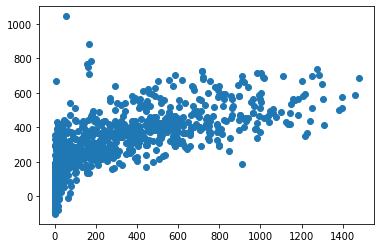

In [43]:
plt.scatter(y_test,lm_predictions)

Our scatter plot isn't exactly in a straight line...not the best model for predicting amount of money spent on wine

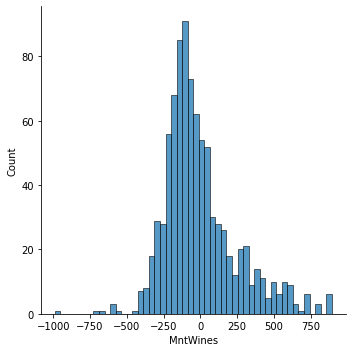

In [44]:
sns.displot((y_test-lm_predictions),bins=50);

Our errors are somewhat normally distributed so that's good

In [45]:
from sklearn import metrics

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, lm_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lm_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)))
print('R^2:',metrics.explained_variance_score(y_test,lm_predictions))

MAE: 186.9809593995319
MSE: 61601.98462202317
RMSE: 248.19747102261775
R^2: 0.44283647069315024


In [48]:
df['MntWines'].mean()

305.09160649819495

Our lm_model's MAE = 186 meaning on average, we are 186 dollars or 61 percent off from our average of $305

Our lm_model's R^2 = 0.44 meaning we explain about 44% of the variance which is very bad

Conclusion: Linear Regression is a bad model for this dataset

## Support Vector Machines

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(df['MntWines']), test_size=0.30, random_state=101)

In [50]:
from sklearn.svm import SVC

In [51]:
SVC_model = SVC()

In [53]:
SVC_model.fit(X_train,y_train)

SVC()

In [55]:
svc_predictions = SVC_model.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(confusion_matrix(y_test,svc_predictions))

[[ 0  0  3 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 [ 0  0  6 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


Support Vector Machines is an algorithm used for assigning new examples into one cateogry or another which makes it
a non-probabilistic binary linear classifier which doesn't make sense to use for a target column of continuous values

## Principal Component Analysis

PCA is an unsupervised learning algorithm which transforms the data and attempts so find otu which feature explains the most variance in your data

Often used with another classification algo

In [59]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()
scaler.fit(df.drop('MntWines',axis=1))


StandardScaler()

In [89]:
scaled_data = scaler.transform(df.drop('MntWines',axis=1))

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components=2)

In [92]:
pca.fit(scaled_data)

PCA(n_components=2)

In [93]:
x_pca = pca.transform(scaled_data)

In [94]:
scaled_data.shape

(2216, 14)

In [95]:
x_pca.shape

(2216, 2)

Text(0, 0.5, 'Second Principal Component')

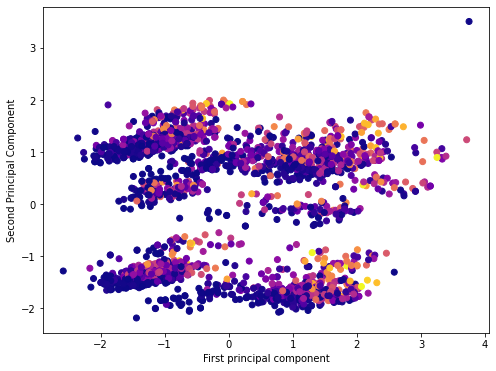

In [96]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['MntWines'],cmap='plasma')
#plotting all the rows from col 0 against all the rows from col 1, color these points by target col
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [97]:
df.columns

Index(['Income', 'Recency', 'MntWines', 'Complain', 'Response', 'Age', 'Basic',
       'Graduation', 'Master', 'PhD', 'Married', 'Single', 'Together', 'Widow',
       'YearsEnrolled'],
      dtype='object')

In [80]:
pca.components_

array([[ 0.49681442, -0.05688861,  0.55077361, -0.05091684,  0.28782423,
         0.29014969, -0.22306474, -0.25952827,  0.10390183,  0.33823056,
        -0.06986981, -0.04419106,  0.0381709 ,  0.13303017,  0.09310426],
       [ 0.26614216,  0.02985207,  0.202749  ,  0.06251088,  0.13891171,
        -0.0391776 , -0.2189588 ,  0.68294351, -0.34764847, -0.37523011,
        -0.21086805,  0.14196929,  0.08080789,  0.00582718,  0.12342904]])

In [98]:
df_comp = pd.DataFrame(pca.components_,columns=['Income', 'Recency', 'Complain', 'Response', 'Age', 'Basic',
       'Graduation', 'Master', 'PhD', 'Married', 'Single', 'Together', 'Widow',
       'YearsEnrolled'])

<AxesSubplot:>

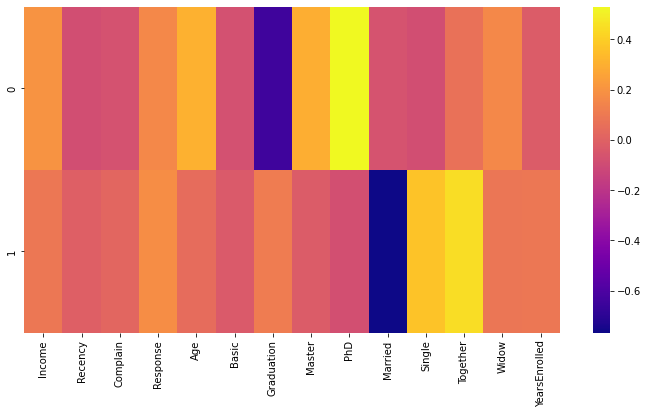

In [99]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

In [100]:
pca = PCA(n_components=4)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
df_comp = pd.DataFrame(pca.components_,columns=['Income', 'Recency', 'Complain', 'Response', 'Age', 'Basic',
       'Graduation', 'Master', 'PhD', 'Married', 'Single', 'Together', 'Widow',
       'YearsEnrolled'])

<AxesSubplot:>

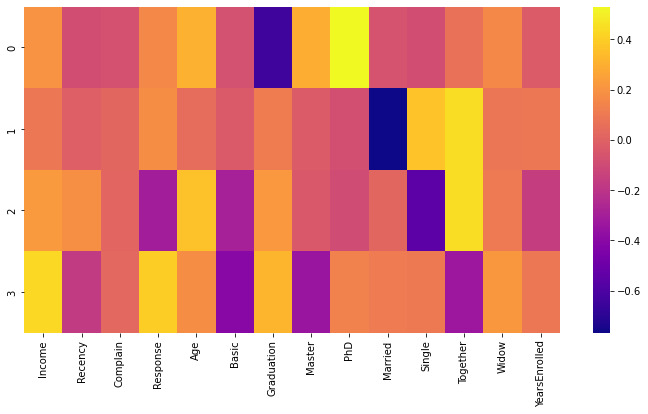

In [101]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

Experimenting with 4 principal components. If we were only choosing 4 variables that affect the amount of wine bought

I would say PhD, Together, Age, and Income

In [104]:
df.head()

,Income,Recency,MntWines,Complain,Response,Age,Basic,Graduation,Master,PhD,Married,Single,Together,Widow,YearsEnrolled
0,58138.0,58,635,0,1,64,0,1,0,0,0,1,0,0,9
1,46344.0,38,11,0,0,67,0,1,0,0,0,1,0,0,7
2,71613.0,26,426,0,0,56,0,1,0,0,0,0,1,0,8
3,26646.0,26,11,0,0,37,0,1,0,0,0,0,1,0,7
4,58293.0,94,173,0,0,40,0,0,0,1,1,0,0,0,7


## Tensor Flow & Neural Networks

In [105]:
X = df.drop('MntWines',axis=1).values
y = df['MntWines'].values

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [109]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [111]:
X_train.shape

(1551, 14)

In [158]:
model = Sequential()

# input layer
model.add(Dense(14,  activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(7, activation='relu'))
model.add(Dropout(0.3))

# hidden layer
#model.add(Dense(3, activation='relu'))
#model.add(Dropout(0.2))

# output layer
model.add(Dense(1))

# Compile model
model.compile(loss='mse', optimizer='adam')

#recall dropout layer turns off 20% of the neurons for 0.2

In [114]:
from tensorflow.keras.callbacks import EarlyStopping

In [142]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [159]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=800,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/800
49/49 [==============================] - 0s 2ms/step - loss: 205641.9375 - val_loss: 207305.2656
Epoch 2/800
49/49 [==============================] - 0s 938us/step - loss: 204595.4531 - val_loss: 205869.0625
Epoch 3/800
49/49 [==============================] - 0s 896us/step - loss: 202562.7812 - val_loss: 203134.5781
Epoch 4/800
49/49 [==============================] - 0s 861us/step - loss: 199191.4375 - val_loss: 198147.4219
Epoch 5/800
49/49 [==============================] - 0s 896us/step - loss: 192515.2656 - val_loss: 189647.9688
Epoch 6/800
49/49 [==============================] - 0s 896us/step - loss: 182173.9844 - val_loss: 177407.7344
Epoch 7/800
49/49 [==============================] - 0s 938us/step - loss: 170073.7969 - val_loss: 163273.0312
Epoch 8/800
49/49 [==============================] - 0s 917us/step - loss: 154764.9219 - val_loss: 148326.7344
Epoch 9/800
49/49 [==============================] - 0s 1ms/step - loss: 143846.3906 - val_loss: 135554.0625
Epoch

49/49 [==============================] - 0s 1ms/step - loss: 108942.8047 - val_loss: 99361.5391
Epoch 75/800
49/49 [==============================] - 0s 999us/step - loss: 107350.5234 - val_loss: 99207.4219
Epoch 76/800
49/49 [==============================] - 0s 1ms/step - loss: 106285.4297 - val_loss: 98990.4766
Epoch 77/800
49/49 [==============================] - 0s 939us/step - loss: 111909.2578 - val_loss: 99113.6328
Epoch 78/800
49/49 [==============================] - 0s 896us/step - loss: 108130.6172 - val_loss: 98873.9844
Epoch 79/800
49/49 [==============================] - 0s 917us/step - loss: 105736.7969 - val_loss: 98802.9688
Epoch 80/800
49/49 [==============================] - 0s 917us/step - loss: 106129.9531 - val_loss: 98572.1406
Epoch 81/800
49/49 [==============================] - 0s 979us/step - loss: 105116.0469 - val_loss: 98466.1016
Epoch 82/800
49/49 [==============================] - 0s 1ms/step - loss: 109890.8984 - val_loss: 98625.3281
Epoch 83/800
49/49 [

Epoch 148/800
49/49 [==============================] - 0s 896us/step - loss: 106037.4844 - val_loss: 92997.5469
Epoch 149/800
49/49 [==============================] - 0s 875us/step - loss: 103181.1406 - val_loss: 92456.4062
Epoch 150/800
49/49 [==============================] - 0s 917us/step - loss: 100168.9922 - val_loss: 92312.9766
Epoch 151/800
49/49 [==============================] - 0s 917us/step - loss: 98547.0703 - val_loss: 91846.6797
Epoch 152/800
49/49 [==============================] - 0s 875us/step - loss: 103745.6094 - val_loss: 91584.7969
Epoch 153/800
49/49 [==============================] - 0s 896us/step - loss: 105608.7344 - val_loss: 91717.6328
Epoch 154/800
49/49 [==============================] - 0s 896us/step - loss: 102935.4688 - val_loss: 91728.1016
Epoch 155/800
49/49 [==============================] - 0s 896us/step - loss: 100754.8281 - val_loss: 91305.9609
Epoch 156/800
49/49 [==============================] - 0s 875us/step - loss: 105441.5781 - val_loss: 9170

49/49 [==============================] - 0s 896us/step - loss: 93809.0078 - val_loss: 81947.3047
Epoch 222/800
49/49 [==============================] - 0s 875us/step - loss: 96438.7969 - val_loss: 81750.4922
Epoch 223/800
49/49 [==============================] - 0s 854us/step - loss: 91915.6016 - val_loss: 81768.7500
Epoch 224/800
49/49 [==============================] - 0s 896us/step - loss: 94107.4922 - val_loss: 81662.1484
Epoch 225/800
49/49 [==============================] - 0s 896us/step - loss: 93077.1562 - val_loss: 81095.7578
Epoch 226/800
49/49 [==============================] - 0s 875us/step - loss: 94099.1641 - val_loss: 81080.7656
Epoch 227/800
49/49 [==============================] - 0s 896us/step - loss: 94226.1016 - val_loss: 80465.7188
Epoch 228/800
49/49 [==============================] - 0s 896us/step - loss: 90800.3984 - val_loss: 80717.6094
Epoch 229/800
49/49 [==============================] - 0s 938us/step - loss: 92703.5234 - val_loss: 80638.4453
Epoch 230/800
4

Epoch 295/800
49/49 [==============================] - 0s 875us/step - loss: 86821.2188 - val_loss: 70456.8359
Epoch 296/800
49/49 [==============================] - 0s 875us/step - loss: 83477.4297 - val_loss: 69711.4844
Epoch 297/800
49/49 [==============================] - 0s 854us/step - loss: 83674.6875 - val_loss: 69900.8359
Epoch 298/800
49/49 [==============================] - 0s 896us/step - loss: 86857.3984 - val_loss: 70166.5547
Epoch 299/800
49/49 [==============================] - 0s 854us/step - loss: 85379.4609 - val_loss: 69648.3516
Epoch 300/800
49/49 [==============================] - 0s 959us/step - loss: 87967.0547 - val_loss: 69323.8047
Epoch 301/800
49/49 [==============================] - 0s 875us/step - loss: 86168.9844 - val_loss: 69334.6328
Epoch 302/800
49/49 [==============================] - 0s 854us/step - loss: 88003.0234 - val_loss: 69758.8828
Epoch 303/800
49/49 [==============================] - 0s 854us/step - loss: 84649.8594 - val_loss: 69845.4844
E

Epoch 369/800
49/49 [==============================] - 0s 854us/step - loss: 84439.3203 - val_loss: 64295.8359
Epoch 370/800
49/49 [==============================] - 0s 875us/step - loss: 81429.5938 - val_loss: 64318.3281
Epoch 371/800
49/49 [==============================] - 0s 875us/step - loss: 90851.0234 - val_loss: 64506.5742
Epoch 372/800
49/49 [==============================] - 0s 875us/step - loss: 90522.2344 - val_loss: 64665.1172
Epoch 373/800
49/49 [==============================] - 0s 854us/step - loss: 80277.4844 - val_loss: 63962.4375
Epoch 374/800
49/49 [==============================] - 0s 854us/step - loss: 79675.5625 - val_loss: 63926.6523
Epoch 375/800
49/49 [==============================] - 0s 875us/step - loss: 79447.4609 - val_loss: 63426.4180
Epoch 376/800
49/49 [==============================] - 0s 854us/step - loss: 85544.7812 - val_loss: 63643.8125
Epoch 377/800
49/49 [==============================] - 0s 834us/step - loss: 85811.2188 - val_loss: 63766.5039
E

Epoch 443/800
49/49 [==============================] - 0s 875us/step - loss: 85822.7656 - val_loss: 63094.9492
Epoch 444/800
49/49 [==============================] - 0s 875us/step - loss: 74330.1641 - val_loss: 62689.6680
Epoch 445/800
49/49 [==============================] - 0s 875us/step - loss: 77947.9219 - val_loss: 62103.0078
Epoch 446/800
49/49 [==============================] - 0s 875us/step - loss: 80440.8906 - val_loss: 62093.8711
Epoch 447/800
49/49 [==============================] - 0s 875us/step - loss: 82036.2109 - val_loss: 61911.5977
Epoch 448/800
49/49 [==============================] - 0s 875us/step - loss: 86450.4688 - val_loss: 62323.0898
Epoch 449/800
49/49 [==============================] - 0s 854us/step - loss: 79865.4219 - val_loss: 62990.3398
Epoch 450/800
49/49 [==============================] - 0s 938us/step - loss: 81424.1328 - val_loss: 61937.4375
Epoch 451/800
49/49 [==============================] - 0s 917us/step - loss: 84977.5312 - val_loss: 62137.3242
E

Epoch 517/800
49/49 [==============================] - 0s 875us/step - loss: 79714.2109 - val_loss: 59535.6758
Epoch 518/800
49/49 [==============================] - 0s 854us/step - loss: 92315.5859 - val_loss: 60540.9805
Epoch 519/800
49/49 [==============================] - 0s 1ms/step - loss: 79460.4844 - val_loss: 61105.4961
Epoch 520/800
49/49 [==============================] - 0s 896us/step - loss: 74888.3516 - val_loss: 60051.6445
Epoch 521/800
49/49 [==============================] - 0s 875us/step - loss: 81112.0391 - val_loss: 60267.2305
Epoch 522/800
49/49 [==============================] - 0s 875us/step - loss: 81090.6641 - val_loss: 59912.5117
Epoch 523/800
49/49 [==============================] - 0s 875us/step - loss: 85080.1016 - val_loss: 59998.2383
Epoch 524/800
49/49 [==============================] - 0s 834us/step - loss: 81028.8203 - val_loss: 59496.1211
Epoch 525/800
49/49 [==============================] - 0s 896us/step - loss: 75840.7031 - val_loss: 59940.5703
Epo

<AxesSubplot:>

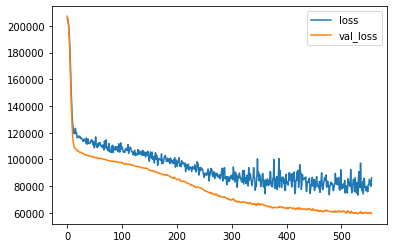

In [160]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [161]:
predictions = model.predict(X_test)
#model.predict_classes(X_test) was not working
predictions

array([[413.45364 ],
       [424.2199  ],
       [ 74.77042 ],
       [347.92365 ],
       [147.10881 ],
       [437.9128  ],
       [432.69284 ],
       [285.15442 ],
       [ 21.753765],
       [305.3932  ],
       [209.79295 ],
       [704.15906 ],
       [ 15.263019],
       [528.0336  ],
       [520.9481  ],
       [293.28482 ],
       [190.114   ],
       [213.79442 ],
       [439.1297  ],
       [ 15.263019],
       [260.28262 ],
       [485.98883 ],
       [361.94067 ],
       [ 22.380676],
       [161.24393 ],
       [152.75809 ],
       [489.27112 ],
       [379.34702 ],
       [ 74.04876 ],
       [387.0909  ],
       [525.79596 ],
       [ 77.34637 ],
       [327.4241  ],
       [360.50607 ],
       [636.14935 ],
       [428.96878 ],
       [349.16168 ],
       [155.47589 ],
       [245.1922  ],
       [267.93408 ],
       [202.32654 ],
       [267.6335  ],
       [424.6188  ],
       [204.58983 ],
       [167.11322 ],
       [ 15.263019],
       [295.04974 ],
       [ 88.0

In [134]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:',metrics.explained_variance_score(y_test,predictions))

MAE: 180.72225600507923
MSE: 65440.94259775329
RMSE: 255.8142736395944
R^2: 0.4325779022699817


Our neural network explains around 43 percent of variance with the average error being 180 dollars off

In [140]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:',metrics.explained_variance_score(y_test,predictions))

MAE: 161.14291393237008
MSE: 56033.09649623387
RMSE: 236.71311010637723
R^2: 0.5152326278788975


Removing our second hidden layer now returns 51 percent variance with average error being 161 dollars off which is a better fit

In [146]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:',metrics.explained_variance_score(y_test,predictions))

MAE: 150.88067570162895
MSE: 55412.39517763736
RMSE: 235.3983754779063
R^2: 0.5336016035791479


In [163]:
df['MntWines'].mean()

305.09160649819495

Increasing the dropout to 30 percent now gives us 53 percent variance and 150 dollars off

However, it's our error is around 50% off which is horrible

In [162]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:',metrics.explained_variance_score(y_test,predictions))

MAE: 162.71093314321416
MSE: 59322.15272546379
RMSE: 243.56139416061774
R^2: 0.4922347279302356


Increasing the dropout to 40 percent now gives us 49 variance and 162 dollars off, would recommend to keep dropout at 30 percent

In [128]:
import random
random.seed(102)
random_ind = random.randint(0,len(df))

new_MntWines = df.drop('MntWines',axis=1).iloc[random_ind]
new_MntWines

Income           30522.0
Recency              6.0
Complain             0.0
Response             0.0
Age                 61.0
Basic                0.0
Graduation           0.0
Master               1.0
PhD                  0.0
Married              1.0
Single               0.0
Together             0.0
Widow                0.0
YearsEnrolled        9.0
Name: 619, dtype: float64

In [129]:
new_MntWines.shape

(14,)

In [130]:
new_MntWines = scaler.transform(new_MntWines.values.reshape(1,14))

In [131]:
model.predict(new_MntWines)

array([[237.6348]], dtype=float32)

In [132]:
df.iloc[random_ind]

Income           30522.0
Recency              6.0
MntWines           179.0
Complain             0.0
Response             0.0
Age                 61.0
Basic                0.0
Graduation           0.0
Master               1.0
PhD                  0.0
Married              1.0
Single               0.0
Together             0.0
Widow                0.0
YearsEnrolled        9.0
Name: 619, dtype: float64

## Conclusion: Our current parameters for our neural network is bad or our current dataset doesn't have enough/good enough data to predict the amount spent on wine

### Going to attempt doing it with our 4 Principal Components

In [164]:
df.columns
#PhD, Together, Age, and Income

Index(['Income', 'Recency', 'MntWines', 'Complain', 'Response', 'Age', 'Basic',
       'Graduation', 'Master', 'PhD', 'Married', 'Single', 'Together', 'Widow',
       'YearsEnrolled'],
      dtype='object')

In [167]:
X = df[['PhD','Together','Age','Income']].values
y = df['MntWines'].values

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [169]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [170]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
X_train.shape

(1551, 4)

In [172]:
model = Sequential()

# input layer
model.add(Dense(4,  activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(2, activation='relu'))
model.add(Dropout(0.3))

# hidden layer
#model.add(Dense(3, activation='relu'))
#model.add(Dropout(0.2))

# output layer
model.add(Dense(1))

# Compile model
model.compile(loss='mse', optimizer='adam')

#recall dropout layer turns off 20% of the neurons for 0.2

In [173]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [178]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=3000,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/3000
49/49 [==============================] - 0s 1ms/step - loss: 184403.8906 - val_loss: 186150.8750
Epoch 2/3000
49/49 [==============================] - 0s 854us/step - loss: 184378.4688 - val_loss: 186124.9531
Epoch 3/3000
49/49 [==============================] - 0s 854us/step - loss: 184353.0938 - val_loss: 186099.2812
Epoch 4/3000
49/49 [==============================] - 0s 854us/step - loss: 184327.6406 - val_loss: 186073.7031
Epoch 5/3000
49/49 [==============================] - 0s 875us/step - loss: 184302.2500 - val_loss: 186048.2031
Epoch 6/3000
49/49 [==============================] - 0s 875us/step - loss: 184276.8438 - val_loss: 186022.0938
Epoch 7/3000
49/49 [==============================] - 0s 875us/step - loss: 184251.4688 - val_loss: 185996.6406
Epoch 8/3000
49/49 [==============================] - 0s 834us/step - loss: 184226.1875 - val_loss: 185970.7969
Epoch 9/3000
49/49 [==============================] - 0s 875us/step - loss: 184201.0000 - val_loss: 185944

49/49 [==============================] - 0s 875us/step - loss: 182593.0312 - val_loss: 184314.2812
Epoch 74/3000
49/49 [==============================] - 0s 896us/step - loss: 182568.2656 - val_loss: 184288.6562
Epoch 75/3000
49/49 [==============================] - 0s 875us/step - loss: 182542.9375 - val_loss: 184263.7656
Epoch 76/3000
49/49 [==============================] - 0s 875us/step - loss: 182518.1719 - val_loss: 184238.5156
Epoch 77/3000
49/49 [==============================] - 0s 875us/step - loss: 182493.2812 - val_loss: 184212.8125
Epoch 78/3000
49/49 [==============================] - 0s 854us/step - loss: 182468.3750 - val_loss: 184187.7188
Epoch 79/3000
49/49 [==============================] - 0s 854us/step - loss: 182443.4375 - val_loss: 184162.6562
Epoch 80/3000
49/49 [==============================] - 0s 896us/step - loss: 182418.5000 - val_loss: 184137.2031
Epoch 81/3000
49/49 [==============================] - 0s 875us/step - loss: 182393.5625 - val_loss: 184111.34

49/49 [==============================] - 0s 875us/step - loss: 180807.0781 - val_loss: 182502.4531
Epoch 146/3000
49/49 [==============================] - 0s 875us/step - loss: 180782.5625 - val_loss: 182477.0312
Epoch 147/3000
49/49 [==============================] - 0s 854us/step - loss: 180757.7188 - val_loss: 182452.6875
Epoch 148/3000
49/49 [==============================] - 0s 875us/step - loss: 180733.3750 - val_loss: 182427.3438
Epoch 149/3000
49/49 [==============================] - 0s 875us/step - loss: 180708.5938 - val_loss: 182402.3750
Epoch 150/3000
49/49 [==============================] - 0s 854us/step - loss: 180683.9219 - val_loss: 182377.5938
Epoch 151/3000
49/49 [==============================] - 0s 854us/step - loss: 180659.4219 - val_loss: 182352.2188
Epoch 152/3000
49/49 [==============================] - 0s 813us/step - loss: 180634.7969 - val_loss: 182327.9062
Epoch 153/3000
49/49 [==============================] - 0s 834us/step - loss: 180610.3125 - val_loss: 1

Epoch 217/3000
49/49 [==============================] - 0s 875us/step - loss: 179046.5000 - val_loss: 180716.1562
Epoch 218/3000
49/49 [==============================] - 0s 854us/step - loss: 179022.3594 - val_loss: 180691.4375
Epoch 219/3000
49/49 [==============================] - 0s 854us/step - loss: 178998.2188 - val_loss: 180666.9219
Epoch 220/3000
49/49 [==============================] - 0s 834us/step - loss: 178974.0156 - val_loss: 180642.6094
Epoch 221/3000
49/49 [==============================] - 0s 834us/step - loss: 178949.6719 - val_loss: 180617.5000
Epoch 222/3000
49/49 [==============================] - 0s 854us/step - loss: 178925.5781 - val_loss: 180593.1406
Epoch 223/3000
49/49 [==============================] - 0s 834us/step - loss: 178901.3281 - val_loss: 180568.3750
Epoch 224/3000
49/49 [==============================] - 0s 834us/step - loss: 178877.1719 - val_loss: 180544.1875
Epoch 225/3000
49/49 [==============================] - 0s 854us/step - loss: 178852.968

Epoch 289/3000
49/49 [==============================] - 0s 813us/step - loss: 177312.1719 - val_loss: 178955.9219
Epoch 290/3000
49/49 [==============================] - 0s 854us/step - loss: 177288.5469 - val_loss: 178931.8594
Epoch 291/3000
49/49 [==============================] - 0s 834us/step - loss: 177264.8906 - val_loss: 178907.0312
Epoch 292/3000
49/49 [==============================] - 0s 875us/step - loss: 177240.8594 - val_loss: 178883.1094
Epoch 293/3000
49/49 [==============================] - 0s 834us/step - loss: 177216.8281 - val_loss: 178858.9062
Epoch 294/3000
49/49 [==============================] - 0s 854us/step - loss: 177192.8750 - val_loss: 178834.7500
Epoch 295/3000
49/49 [==============================] - 0s 854us/step - loss: 177168.9531 - val_loss: 178809.9688
Epoch 296/3000
49/49 [==============================] - 0s 834us/step - loss: 177144.7969 - val_loss: 178786.0156
Epoch 297/3000
49/49 [==============================] - 0s 875us/step - loss: 177120.843

Epoch 361/3000
49/49 [==============================] - 0s 834us/step - loss: 175600.6094 - val_loss: 177218.4531
Epoch 362/3000
49/49 [==============================] - 0s 813us/step - loss: 175577.0469 - val_loss: 177194.2344
Epoch 363/3000
49/49 [==============================] - 0s 834us/step - loss: 175553.3750 - val_loss: 177170.5312
Epoch 364/3000
49/49 [==============================] - 0s 875us/step - loss: 175530.0938 - val_loss: 177146.6406
Epoch 365/3000
49/49 [==============================] - 0s 854us/step - loss: 175506.3594 - val_loss: 177122.6250
Epoch 366/3000
49/49 [==============================] - 0s 854us/step - loss: 175483.1719 - val_loss: 177098.4531
Epoch 367/3000
49/49 [==============================] - 0s 834us/step - loss: 175459.4844 - val_loss: 177074.3594
Epoch 368/3000
49/49 [==============================] - 0s 854us/step - loss: 175435.7656 - val_loss: 177050.6094
Epoch 369/3000
49/49 [==============================] - 0s 854us/step - loss: 175412.078

Epoch 433/3000
49/49 [==============================] - 0s 834us/step - loss: 173913.0469 - val_loss: 175504.6875
Epoch 434/3000
49/49 [==============================] - 0s 854us/step - loss: 173890.0469 - val_loss: 175481.0156
Epoch 435/3000
49/49 [==============================] - 0s 854us/step - loss: 173866.6875 - val_loss: 175457.5000
Epoch 436/3000
49/49 [==============================] - 0s 834us/step - loss: 173843.6875 - val_loss: 175433.8281
Epoch 437/3000
49/49 [==============================] - 0s 834us/step - loss: 173820.5781 - val_loss: 175410.6875
Epoch 438/3000
49/49 [==============================] - 0s 875us/step - loss: 173797.4531 - val_loss: 175386.9375
Epoch 439/3000
49/49 [==============================] - 0s 834us/step - loss: 173773.7031 - val_loss: 175363.2812
Epoch 440/3000
49/49 [==============================] - 0s 854us/step - loss: 173750.7969 - val_loss: 175339.7812
Epoch 441/3000
49/49 [==============================] - 0s 834us/step - loss: 173727.765

Epoch 505/3000
49/49 [==============================] - 0s 854us/step - loss: 172249.4062 - val_loss: 173815.6094
Epoch 506/3000
49/49 [==============================] - 0s 875us/step - loss: 172227.2656 - val_loss: 173792.1875
Epoch 507/3000
49/49 [==============================] - 0s 854us/step - loss: 172204.3125 - val_loss: 173768.8750
Epoch 508/3000
49/49 [==============================] - 0s 854us/step - loss: 172181.4688 - val_loss: 173745.5312
Epoch 509/3000
49/49 [==============================] - 0s 854us/step - loss: 172157.9688 - val_loss: 173721.9844
Epoch 510/3000
49/49 [==============================] - 0s 854us/step - loss: 172134.9531 - val_loss: 173699.1406
Epoch 511/3000
49/49 [==============================] - 0s 854us/step - loss: 172112.8594 - val_loss: 173676.1406
Epoch 512/3000
49/49 [==============================] - 0s 854us/step - loss: 172089.4688 - val_loss: 173652.5781
Epoch 513/3000
49/49 [==============================] - 0s 834us/step - loss: 172066.812

Epoch 577/3000
49/49 [==============================] - 0s 854us/step - loss: 170613.7500 - val_loss: 172153.5000
Epoch 578/3000
49/49 [==============================] - 0s 854us/step - loss: 170590.6562 - val_loss: 172130.4688
Epoch 579/3000
49/49 [==============================] - 0s 875us/step - loss: 170568.0000 - val_loss: 172107.2812
Epoch 580/3000
49/49 [==============================] - 0s 854us/step - loss: 170545.4219 - val_loss: 172084.0625
Epoch 581/3000
49/49 [==============================] - 0s 854us/step - loss: 170522.7344 - val_loss: 172061.1719
Epoch 582/3000
49/49 [==============================] - 0s 834us/step - loss: 170500.2344 - val_loss: 172038.3750
Epoch 583/3000
49/49 [==============================] - 0s 854us/step - loss: 170477.6250 - val_loss: 172015.3906
Epoch 584/3000
49/49 [==============================] - 0s 813us/step - loss: 170455.0469 - val_loss: 171992.5156
Epoch 585/3000
49/49 [==============================] - 0s 875us/step - loss: 170433.531

Epoch 649/3000
49/49 [==============================] - 0s 854us/step - loss: 168999.7344 - val_loss: 170512.5000
Epoch 650/3000
49/49 [==============================] - 0s 875us/step - loss: 168977.4688 - val_loss: 170489.7500
Epoch 651/3000
49/49 [==============================] - 0s 875us/step - loss: 168953.7656 - val_loss: 170467.1875
Epoch 652/3000
49/49 [==============================] - 0s 875us/step - loss: 168931.7188 - val_loss: 170444.7500
Epoch 653/3000
49/49 [==============================] - 0s 854us/step - loss: 168910.6875 - val_loss: 170421.8125
Epoch 654/3000
49/49 [==============================] - 0s 844us/step - loss: 168887.6719 - val_loss: 170399.4844
Epoch 655/3000
49/49 [==============================] - 0s 854us/step - loss: 168865.5938 - val_loss: 170376.9688
Epoch 656/3000
49/49 [==============================] - 0s 854us/step - loss: 168844.0938 - val_loss: 170354.2344
Epoch 657/3000
49/49 [==============================] - 0s 854us/step - loss: 168821.484

Epoch 721/3000
49/49 [==============================] - 0s 834us/step - loss: 167410.3125 - val_loss: 168898.4375
Epoch 722/3000
49/49 [==============================] - 0s 854us/step - loss: 167390.0781 - val_loss: 168876.4375
Epoch 723/3000
49/49 [==============================] - 0s 854us/step - loss: 167368.4219 - val_loss: 168854.1406
Epoch 724/3000
49/49 [==============================] - 0s 854us/step - loss: 167346.6250 - val_loss: 168831.9375
Epoch 725/3000
49/49 [==============================] - 0s 875us/step - loss: 167324.0156 - val_loss: 168809.9062
Epoch 726/3000
49/49 [==============================] - 0s 854us/step - loss: 167302.9375 - val_loss: 168787.4375
Epoch 727/3000
49/49 [==============================] - 0s 854us/step - loss: 167279.3906 - val_loss: 168765.4844
Epoch 728/3000
49/49 [==============================] - 0s 854us/step - loss: 167258.4688 - val_loss: 168743.1406
Epoch 729/3000
49/49 [==============================] - 0s 854us/step - loss: 167235.843

Epoch 793/3000
49/49 [==============================] - 0s 834us/step - loss: 165848.5469 - val_loss: 167309.1094
Epoch 794/3000
49/49 [==============================] - 0s 834us/step - loss: 165827.2031 - val_loss: 167286.7031
Epoch 795/3000
49/49 [==============================] - 0s 854us/step - loss: 165805.5312 - val_loss: 167265.1406
Epoch 796/3000
49/49 [==============================] - 0s 834us/step - loss: 165784.2500 - val_loss: 167243.0312
Epoch 797/3000
49/49 [==============================] - 0s 854us/step - loss: 165761.4688 - val_loss: 167221.4375
Epoch 798/3000
49/49 [==============================] - 0s 854us/step - loss: 165739.9062 - val_loss: 167199.4375
Epoch 799/3000
49/49 [==============================] - 0s 834us/step - loss: 165717.6250 - val_loss: 167177.2812
Epoch 800/3000
49/49 [==============================] - 0s 854us/step - loss: 165697.9844 - val_loss: 167155.6250
Epoch 801/3000
49/49 [==============================] - 0s 833us/step - loss: 165675.296

Epoch 865/3000
49/49 [==============================] - 0s 875us/step - loss: 164309.1406 - val_loss: 165745.4062
Epoch 866/3000
49/49 [==============================] - 0s 834us/step - loss: 164288.6875 - val_loss: 165723.8438
Epoch 867/3000
49/49 [==============================] - 0s 854us/step - loss: 164266.7031 - val_loss: 165702.2031
Epoch 868/3000
49/49 [==============================] - 0s 854us/step - loss: 164245.6562 - val_loss: 165680.3281
Epoch 869/3000
49/49 [==============================] - 0s 875us/step - loss: 164224.2188 - val_loss: 165659.0156
Epoch 870/3000
49/49 [==============================] - 0s 854us/step - loss: 164202.9219 - val_loss: 165637.1250
Epoch 871/3000
49/49 [==============================] - 0s 854us/step - loss: 164181.7031 - val_loss: 165615.6719
Epoch 872/3000
49/49 [==============================] - 0s 854us/step - loss: 164160.4375 - val_loss: 165593.8594
Epoch 873/3000
49/49 [==============================] - 0s 875us/step - loss: 164141.656

Epoch 937/3000
49/49 [==============================] - 0s 854us/step - loss: 162795.3594 - val_loss: 164205.2500
Epoch 938/3000
49/49 [==============================] - 0s 813us/step - loss: 162777.3125 - val_loss: 164183.9219
Epoch 939/3000
49/49 [==============================] - 0s 854us/step - loss: 162755.2969 - val_loss: 164162.5625
Epoch 940/3000
49/49 [==============================] - 0s 896us/step - loss: 162733.9062 - val_loss: 164141.5938
Epoch 941/3000
49/49 [==============================] - 0s 979us/step - loss: 162714.8594 - val_loss: 164120.5781
Epoch 942/3000
49/49 [==============================] - 0s 938us/step - loss: 162691.3281 - val_loss: 164099.5156
Epoch 943/3000
49/49 [==============================] - 0s 979us/step - loss: 162673.0312 - val_loss: 164078.2969
Epoch 944/3000
49/49 [==============================] - 0s 875us/step - loss: 162649.5156 - val_loss: 164056.9062
Epoch 945/3000
49/49 [==============================] - 0s 854us/step - loss: 162631.203

Epoch 1009/3000
49/49 [==============================] - 0s 833us/step - loss: 161304.5000 - val_loss: 162689.2969
Epoch 1010/3000
49/49 [==============================] - 0s 834us/step - loss: 161283.5625 - val_loss: 162667.0625
Epoch 1011/3000
49/49 [==============================] - 0s 854us/step - loss: 161263.0938 - val_loss: 162645.9844
Epoch 1012/3000
49/49 [==============================] - 0s 854us/step - loss: 161245.6094 - val_loss: 162625.3906
Epoch 1013/3000
49/49 [==============================] - 0s 854us/step - loss: 161225.1875 - val_loss: 162604.5781
Epoch 1014/3000
49/49 [==============================] - 0s 834us/step - loss: 161204.6250 - val_loss: 162583.9688
Epoch 1015/3000
49/49 [==============================] - 0s 834us/step - loss: 161182.1875 - val_loss: 162562.6406
Epoch 1016/3000
49/49 [==============================] - 0s 854us/step - loss: 161163.6562 - val_loss: 162542.0469
Epoch 1017/3000
49/49 [==============================] - 0s 854us/step - loss: 1

49/49 [==============================] - 0s 875us/step - loss: 159860.9531 - val_loss: 161216.7344
Epoch 1081/3000
49/49 [==============================] - 0s 854us/step - loss: 159840.9531 - val_loss: 161196.3438
Epoch 1082/3000
49/49 [==============================] - 0s 896us/step - loss: 159818.4375 - val_loss: 161176.6094
Epoch 1083/3000
49/49 [==============================] - 0s 875us/step - loss: 159797.5469 - val_loss: 161153.9844
Epoch 1084/3000
49/49 [==============================] - 0s 875us/step - loss: 159780.2344 - val_loss: 161133.8594
Epoch 1085/3000
49/49 [==============================] - 0s 854us/step - loss: 159756.9219 - val_loss: 161113.1250
Epoch 1086/3000
49/49 [==============================] - 0s 875us/step - loss: 159737.9375 - val_loss: 161093.0781
Epoch 1087/3000
49/49 [==============================] - 0s 854us/step - loss: 159720.1562 - val_loss: 161072.8906
Epoch 1088/3000
49/49 [==============================] - 0s 854us/step - loss: 159696.4375 - val

49/49 [==============================] - 0s 854us/step - loss: 158440.8438 - val_loss: 159771.1250
Epoch 1152/3000
49/49 [==============================] - 0s 854us/step - loss: 158417.1406 - val_loss: 159751.0156
Epoch 1153/3000
49/49 [==============================] - 0s 834us/step - loss: 158398.4062 - val_loss: 159731.0312
Epoch 1154/3000
49/49 [==============================] - 0s 854us/step - loss: 158377.5000 - val_loss: 159711.0312
Epoch 1155/3000
49/49 [==============================] - 0s 854us/step - loss: 158357.6719 - val_loss: 159690.6875
Epoch 1156/3000
49/49 [==============================] - 0s 854us/step - loss: 158341.6250 - val_loss: 159670.2031
Epoch 1157/3000
49/49 [==============================] - 0s 875us/step - loss: 158321.7656 - val_loss: 159649.8594
Epoch 1158/3000
49/49 [==============================] - 0s 854us/step - loss: 158299.2656 - val_loss: 159630.2344
Epoch 1159/3000
49/49 [==============================] - 0s 854us/step - loss: 158278.5625 - val

49/49 [==============================] - 0s 854us/step - loss: 157038.9219 - val_loss: 158346.2188
Epoch 1223/3000
49/49 [==============================] - 0s 854us/step - loss: 157023.5625 - val_loss: 158326.2656
Epoch 1224/3000
49/49 [==============================] - 0s 834us/step - loss: 157003.6406 - val_loss: 158306.5781
Epoch 1225/3000
49/49 [==============================] - 0s 875us/step - loss: 156980.5312 - val_loss: 158286.5000
Epoch 1226/3000
49/49 [==============================] - 0s 854us/step - loss: 156965.0469 - val_loss: 158266.9062
Epoch 1227/3000
49/49 [==============================] - 0s 854us/step - loss: 156945.7500 - val_loss: 158247.0781
Epoch 1228/3000
49/49 [==============================] - 0s 834us/step - loss: 156926.1719 - val_loss: 158227.2812
Epoch 1229/3000
49/49 [==============================] - 0s 875us/step - loss: 156902.3594 - val_loss: 158207.3125
Epoch 1230/3000
49/49 [==============================] - 0s 834us/step - loss: 156886.7500 - val

49/49 [==============================] - 0s 834us/step - loss: 155664.6094 - val_loss: 156946.1875
Epoch 1294/3000
49/49 [==============================] - 0s 854us/step - loss: 155649.9219 - val_loss: 156926.5938
Epoch 1295/3000
49/49 [==============================] - 0s 854us/step - loss: 155626.4688 - val_loss: 156907.1719
Epoch 1296/3000
49/49 [==============================] - 0s 875us/step - loss: 155607.2500 - val_loss: 156887.5938
Epoch 1297/3000
49/49 [==============================] - 0s 875us/step - loss: 155591.4688 - val_loss: 156868.2812
Epoch 1298/3000
49/49 [==============================] - 0s 875us/step - loss: 155571.7031 - val_loss: 156848.7031
Epoch 1299/3000
49/49 [==============================] - 0s 854us/step - loss: 155549.9844 - val_loss: 156828.9531
Epoch 1300/3000
49/49 [==============================] - 0s 833us/step - loss: 155534.6094 - val_loss: 156809.3594
Epoch 1301/3000
49/49 [==============================] - 0s 834us/step - loss: 155512.6719 - val

49/49 [==============================] - 0s 833us/step - loss: 154316.9531 - val_loss: 155573.3438
Epoch 1365/3000
49/49 [==============================] - 0s 854us/step - loss: 154302.6250 - val_loss: 155554.1719
Epoch 1366/3000
49/49 [==============================] - 0s 834us/step - loss: 154279.3906 - val_loss: 155535.0938
Epoch 1367/3000
49/49 [==============================] - 0s 834us/step - loss: 154264.8750 - val_loss: 155515.5781
Epoch 1368/3000
49/49 [==============================] - 0s 834us/step - loss: 154241.4844 - val_loss: 155496.5781
Epoch 1369/3000
49/49 [==============================] - 0s 854us/step - loss: 154223.0312 - val_loss: 155477.3125
Epoch 1370/3000
49/49 [==============================] - 0s 875us/step - loss: 154204.1562 - val_loss: 155458.2344
Epoch 1371/3000
49/49 [==============================] - 0s 854us/step - loss: 154189.4375 - val_loss: 155438.7812
Epoch 1372/3000
49/49 [==============================] - 0s 854us/step - loss: 154168.7969 - val

49/49 [==============================] - 0s 834us/step - loss: 152990.4375 - val_loss: 154222.2500
Epoch 1436/3000
49/49 [==============================] - 0s 854us/step - loss: 152976.8594 - val_loss: 154203.6250
Epoch 1437/3000
49/49 [==============================] - 0s 854us/step - loss: 152956.1562 - val_loss: 154184.9219
Epoch 1438/3000
49/49 [==============================] - 0s 854us/step - loss: 152933.7500 - val_loss: 154166.0781
Epoch 1439/3000
49/49 [==============================] - 0s 854us/step - loss: 152915.7500 - val_loss: 154147.6875
Epoch 1440/3000
49/49 [==============================] - 0s 854us/step - loss: 152900.1094 - val_loss: 154128.7031
Epoch 1441/3000
49/49 [==============================] - 0s 896us/step - loss: 152884.3594 - val_loss: 154109.3594
Epoch 1442/3000
49/49 [==============================] - 0s 834us/step - loss: 152863.0156 - val_loss: 154091.4062
Epoch 1443/3000
49/49 [==============================] - 0s 834us/step - loss: 152843.7969 - val

49/49 [==============================] - 0s 854us/step - loss: 151686.8906 - val_loss: 152897.9688
Epoch 1507/3000
49/49 [==============================] - 0s 854us/step - loss: 151673.8438 - val_loss: 152878.8906
Epoch 1508/3000
49/49 [==============================] - 0s 834us/step - loss: 151654.0312 - val_loss: 152860.4688
Epoch 1509/3000
49/49 [==============================] - 0s 854us/step - loss: 151635.2812 - val_loss: 152842.4219
Epoch 1510/3000
49/49 [==============================] - 0s 854us/step - loss: 151621.6094 - val_loss: 152824.4531
Epoch 1511/3000
49/49 [==============================] - 0s 875us/step - loss: 151600.3750 - val_loss: 152806.7344
Epoch 1512/3000
49/49 [==============================] - 0s 854us/step - loss: 151580.6562 - val_loss: 152787.7031
Epoch 1513/3000
49/49 [==============================] - 0s 834us/step - loss: 151563.0938 - val_loss: 152769.1719
Epoch 1514/3000
49/49 [==============================] - 0s 834us/step - loss: 151548.7969 - val

49/49 [==============================] - 0s 854us/step - loss: 150401.8750 - val_loss: 151597.7656
Epoch 1578/3000
49/49 [==============================] - 0s 833us/step - loss: 150393.0000 - val_loss: 151579.4219
Epoch 1579/3000
49/49 [==============================] - 0s 854us/step - loss: 150380.9531 - val_loss: 151560.7031
Epoch 1580/3000
49/49 [==============================] - 0s 834us/step - loss: 150351.6875 - val_loss: 151542.7188
Epoch 1581/3000
49/49 [==============================] - 0s 834us/step - loss: 150342.5781 - val_loss: 151523.1406
Epoch 1582/3000
49/49 [==============================] - 0s 859us/step - loss: 150317.0469 - val_loss: 151506.5312
Epoch 1583/3000
49/49 [==============================] - 0s 834us/step - loss: 150307.7812 - val_loss: 151489.2344
Epoch 1584/3000
49/49 [==============================] - 0s 828us/step - loss: 150289.4531 - val_loss: 151469.9531
Epoch 1585/3000
49/49 [==============================] - 0s 875us/step - loss: 150261.3438 - val

49/49 [==============================] - 0s 917us/step - loss: 149129.7031 - val_loss: 150310.5156
Epoch 1649/3000
49/49 [==============================] - 0s 875us/step - loss: 149137.3281 - val_loss: 150291.6094
Epoch 1650/3000
49/49 [==============================] - 0s 854us/step - loss: 149107.1719 - val_loss: 150273.0625
Epoch 1651/3000
49/49 [==============================] - 0s 896us/step - loss: 149110.0625 - val_loss: 150256.2812
Epoch 1652/3000
49/49 [==============================] - 0s 979us/step - loss: 149081.5312 - val_loss: 150238.2188
Epoch 1653/3000
49/49 [==============================] - 0s 959us/step - loss: 149048.6250 - val_loss: 150219.8281
Epoch 1654/3000
49/49 [==============================] - 0s 959us/step - loss: 149039.3125 - val_loss: 150201.4219
Epoch 1655/3000
49/49 [==============================] - 0s 938us/step - loss: 149017.3594 - val_loss: 150183.8750
Epoch 1656/3000
49/49 [==============================] - 0s 938us/step - loss: 149013.3125 - val

49/49 [==============================] - 0s 833us/step - loss: 147878.8281 - val_loss: 148995.7188
Epoch 1720/3000
49/49 [==============================] - 0s 834us/step - loss: 147831.8438 - val_loss: 148971.6875
Epoch 1721/3000
49/49 [==============================] - 0s 834us/step - loss: 147793.5000 - val_loss: 148952.0156
Epoch 1722/3000
49/49 [==============================] - 0s 854us/step - loss: 147786.7031 - val_loss: 148929.1250
Epoch 1723/3000
49/49 [==============================] - 0s 834us/step - loss: 147791.3594 - val_loss: 148911.6719
Epoch 1724/3000
49/49 [==============================] - 0s 813us/step - loss: 147766.8594 - val_loss: 148893.4062
Epoch 1725/3000
49/49 [==============================] - 0s 813us/step - loss: 147742.2812 - val_loss: 148866.7969
Epoch 1726/3000
49/49 [==============================] - 0s 854us/step - loss: 147728.6250 - val_loss: 148852.1875
Epoch 1727/3000
49/49 [==============================] - 0s 813us/step - loss: 147705.4844 - val

49/49 [==============================] - 0s 813us/step - loss: 145790.2344 - val_loss: 146756.7344
Epoch 1791/3000
49/49 [==============================] - 0s 854us/step - loss: 145676.4688 - val_loss: 146723.4062
Epoch 1792/3000
49/49 [==============================] - 0s 854us/step - loss: 145745.5469 - val_loss: 146696.4688
Epoch 1793/3000
49/49 [==============================] - 0s 854us/step - loss: 145618.3125 - val_loss: 146661.6875
Epoch 1794/3000
49/49 [==============================] - 0s 833us/step - loss: 145598.2656 - val_loss: 146645.9375
Epoch 1795/3000
49/49 [==============================] - 0s 854us/step - loss: 145556.4375 - val_loss: 146593.7500
Epoch 1796/3000
49/49 [==============================] - 0s 834us/step - loss: 145617.7188 - val_loss: 146573.5469
Epoch 1797/3000
49/49 [==============================] - 0s 854us/step - loss: 145662.0781 - val_loss: 146548.1094
Epoch 1798/3000
49/49 [==============================] - 0s 854us/step - loss: 145593.0938 - val

49/49 [==============================] - 0s 854us/step - loss: 144262.8281 - val_loss: 145051.4219
Epoch 1862/3000
49/49 [==============================] - 0s 875us/step - loss: 144172.0938 - val_loss: 145057.8594
Epoch 1863/3000
49/49 [==============================] - 0s 834us/step - loss: 144171.1250 - val_loss: 145017.2031
Epoch 1864/3000
49/49 [==============================] - 0s 854us/step - loss: 144228.7031 - val_loss: 145003.0625
Epoch 1865/3000
49/49 [==============================] - 0s 854us/step - loss: 144084.2344 - val_loss: 144966.2188
Epoch 1866/3000
49/49 [==============================] - 0s 875us/step - loss: 144132.8594 - val_loss: 144965.5625
Epoch 1867/3000
49/49 [==============================] - 0s 834us/step - loss: 144199.3750 - val_loss: 144933.5938
Epoch 1868/3000
49/49 [==============================] - 0s 834us/step - loss: 144136.9688 - val_loss: 144925.7188
Epoch 1869/3000
49/49 [==============================] - 0s 854us/step - loss: 144078.3281 - val

49/49 [==============================] - 0s 917us/step - loss: 142901.9062 - val_loss: 143715.2656
Epoch 1933/3000
49/49 [==============================] - 0s 875us/step - loss: 142995.5000 - val_loss: 143677.8438
Epoch 1934/3000
49/49 [==============================] - 0s 854us/step - loss: 143017.0312 - val_loss: 143668.5000
Epoch 1935/3000
49/49 [==============================] - 0s 875us/step - loss: 142713.1875 - val_loss: 143568.0625
Epoch 1936/3000
49/49 [==============================] - 0s 875us/step - loss: 142890.5938 - val_loss: 143629.6719
Epoch 1937/3000
49/49 [==============================] - 0s 875us/step - loss: 142872.5469 - val_loss: 143603.5781
Epoch 1938/3000
49/49 [==============================] - 0s 896us/step - loss: 142901.4844 - val_loss: 143557.4844
Epoch 1939/3000
49/49 [==============================] - 0s 896us/step - loss: 142838.8125 - val_loss: 143527.4844
Epoch 1940/3000
49/49 [==============================] - 0s 875us/step - loss: 142833.3438 - val

49/49 [==============================] - 0s 875us/step - loss: 141764.5312 - val_loss: 142356.2656
Epoch 2004/3000
49/49 [==============================] - 0s 896us/step - loss: 141817.0156 - val_loss: 142348.5156
Epoch 2005/3000
49/49 [==============================] - 0s 875us/step - loss: 141622.3594 - val_loss: 142304.3594
Epoch 2006/3000
49/49 [==============================] - 0s 875us/step - loss: 141666.1250 - val_loss: 142334.5938
Epoch 2007/3000
49/49 [==============================] - 0s 854us/step - loss: 141832.2500 - val_loss: 142287.2969
Epoch 2008/3000
49/49 [==============================] - 0s 875us/step - loss: 141661.8594 - val_loss: 142300.6875
Epoch 2009/3000
49/49 [==============================] - 0s 854us/step - loss: 141546.2969 - val_loss: 142230.1250
Epoch 2010/3000
49/49 [==============================] - 0s 896us/step - loss: 141585.8906 - val_loss: 142287.3281
Epoch 2011/3000
49/49 [==============================] - 0s 896us/step - loss: 141523.9531 - val

49/49 [==============================] - 0s 875us/step - loss: 140525.6406 - val_loss: 141090.4375
Epoch 2075/3000
49/49 [==============================] - 0s 875us/step - loss: 140450.1094 - val_loss: 141095.4062
Epoch 2076/3000
49/49 [==============================] - 0s 875us/step - loss: 140417.7500 - val_loss: 141061.0156
Epoch 2077/3000
49/49 [==============================] - 0s 875us/step - loss: 140551.7500 - val_loss: 141103.8750
Epoch 2078/3000
49/49 [==============================] - 0s 875us/step - loss: 140304.2344 - val_loss: 140991.8750
Epoch 2079/3000
49/49 [==============================] - 0s 854us/step - loss: 140380.3750 - val_loss: 140963.4531
Epoch 2080/3000
49/49 [==============================] - 0s 875us/step - loss: 140359.1562 - val_loss: 140974.3594
Epoch 2081/3000
49/49 [==============================] - 0s 854us/step - loss: 140332.2500 - val_loss: 140985.6094
Epoch 2082/3000
49/49 [==============================] - 0s 854us/step - loss: 140439.4375 - val

49/49 [==============================] - 0s 875us/step - loss: 139209.7969 - val_loss: 139762.9531
Epoch 2146/3000
49/49 [==============================] - 0s 834us/step - loss: 139245.4375 - val_loss: 139755.1094
Epoch 2147/3000
49/49 [==============================] - 0s 854us/step - loss: 139412.1094 - val_loss: 139751.0156
Epoch 2148/3000
49/49 [==============================] - 0s 875us/step - loss: 139263.0469 - val_loss: 139733.7344
Epoch 2149/3000
49/49 [==============================] - 0s 854us/step - loss: 139272.0000 - val_loss: 139737.0781
Epoch 2150/3000
49/49 [==============================] - 0s 834us/step - loss: 139185.4062 - val_loss: 139689.5312
Epoch 2151/3000
49/49 [==============================] - 0s 854us/step - loss: 139120.6875 - val_loss: 139655.2969
Epoch 2152/3000
49/49 [==============================] - 0s 854us/step - loss: 139214.1875 - val_loss: 139733.2500
Epoch 2153/3000
49/49 [==============================] - 0s 854us/step - loss: 139128.0938 - val

49/49 [==============================] - 0s 875us/step - loss: 138060.1875 - val_loss: 138528.8125
Epoch 2217/3000
49/49 [==============================] - 0s 854us/step - loss: 138020.3594 - val_loss: 138425.2812
Epoch 2218/3000
49/49 [==============================] - 0s 875us/step - loss: 138020.6250 - val_loss: 138439.4531
Epoch 2219/3000
49/49 [==============================] - 0s 875us/step - loss: 137993.9688 - val_loss: 138464.6406
Epoch 2220/3000
49/49 [==============================] - 0s 834us/step - loss: 138012.7344 - val_loss: 138423.9531
Epoch 2221/3000
49/49 [==============================] - 0s 854us/step - loss: 137916.1250 - val_loss: 138439.6094
Epoch 2222/3000
49/49 [==============================] - 0s 854us/step - loss: 137969.7031 - val_loss: 138436.7656
Epoch 2223/3000
49/49 [==============================] - 0s 854us/step - loss: 137812.7188 - val_loss: 138382.8750
Epoch 2224/3000
49/49 [==============================] - 0s 875us/step - loss: 137941.8125 - val

49/49 [==============================] - 0s 875us/step - loss: 136726.2344 - val_loss: 137165.5781
Epoch 2288/3000
49/49 [==============================] - 0s 875us/step - loss: 136681.9062 - val_loss: 137100.5625
Epoch 2289/3000
49/49 [==============================] - 0s 917us/step - loss: 136690.7188 - val_loss: 137037.1094
Epoch 2290/3000
49/49 [==============================] - 0s 896us/step - loss: 136891.2812 - val_loss: 137100.6094
Epoch 2291/3000
49/49 [==============================] - 0s 896us/step - loss: 136608.4375 - val_loss: 137046.6094
Epoch 2292/3000
49/49 [==============================] - 0s 854us/step - loss: 136553.3125 - val_loss: 136971.1250
Epoch 2293/3000
49/49 [==============================] - 0s 854us/step - loss: 136492.9844 - val_loss: 136996.6250
Epoch 2294/3000
49/49 [==============================] - 0s 854us/step - loss: 136674.5469 - val_loss: 136950.8594
Epoch 2295/3000
49/49 [==============================] - 0s 875us/step - loss: 136631.5625 - val

49/49 [==============================] - 0s 854us/step - loss: 135285.4844 - val_loss: 135592.0625
Epoch 2359/3000
49/49 [==============================] - 0s 834us/step - loss: 135254.7656 - val_loss: 135547.3125
Epoch 2360/3000
49/49 [==============================] - 0s 875us/step - loss: 135179.9062 - val_loss: 135461.4219
Epoch 2361/3000
49/49 [==============================] - 0s 896us/step - loss: 135243.9688 - val_loss: 135473.8906
Epoch 2362/3000
49/49 [==============================] - 0s 896us/step - loss: 135233.0469 - val_loss: 135435.4688
Epoch 2363/3000
49/49 [==============================] - 0s 917us/step - loss: 135285.4375 - val_loss: 135374.9844
Epoch 2364/3000
49/49 [==============================] - 0s 875us/step - loss: 135373.6719 - val_loss: 135478.5156
Epoch 2365/3000
49/49 [==============================] - 0s 875us/step - loss: 135258.9062 - val_loss: 135421.9844
Epoch 2366/3000
49/49 [==============================] - 0s 959us/step - loss: 135150.5781 - val

49/49 [==============================] - 0s 875us/step - loss: 133859.7812 - val_loss: 134107.4844
Epoch 2430/3000
49/49 [==============================] - 0s 896us/step - loss: 133872.2656 - val_loss: 134120.5000
Epoch 2431/3000
49/49 [==============================] - 0s 854us/step - loss: 134126.2188 - val_loss: 134055.6406
Epoch 2432/3000
49/49 [==============================] - 0s 917us/step - loss: 134113.7812 - val_loss: 134004.7344
Epoch 2433/3000
49/49 [==============================] - 0s 959us/step - loss: 133595.1250 - val_loss: 133951.8906
Epoch 2434/3000
49/49 [==============================] - 0s 938us/step - loss: 133984.9688 - val_loss: 134016.8594
Epoch 2435/3000
49/49 [==============================] - 0s 979us/step - loss: 134018.9375 - val_loss: 133986.9531
Epoch 2436/3000
49/49 [==============================] - 0s 917us/step - loss: 133956.6250 - val_loss: 133923.8906
Epoch 2437/3000
49/49 [==============================] - 0s 917us/step - loss: 133845.2031 - val

49/49 [==============================] - 0s 875us/step - loss: 132781.9688 - val_loss: 132733.1562
Epoch 2501/3000
49/49 [==============================] - 0s 896us/step - loss: 132650.3125 - val_loss: 132757.0469
Epoch 2502/3000
49/49 [==============================] - 0s 917us/step - loss: 132727.5781 - val_loss: 132683.7656
Epoch 2503/3000
49/49 [==============================] - 0s 917us/step - loss: 132775.8125 - val_loss: 132776.5938
Epoch 2504/3000
49/49 [==============================] - 0s 917us/step - loss: 132769.8594 - val_loss: 132729.2812
Epoch 2505/3000
49/49 [==============================] - 0s 906us/step - loss: 132742.4219 - val_loss: 132636.4688
Epoch 2506/3000
49/49 [==============================] - 0s 875us/step - loss: 132839.7969 - val_loss: 132680.8438
Epoch 2507/3000
49/49 [==============================] - 0s 875us/step - loss: 132691.2344 - val_loss: 132668.7500
Epoch 2508/3000
49/49 [==============================] - 0s 875us/step - loss: 132700.3750 - val

49/49 [==============================] - 0s 854us/step - loss: 131537.5312 - val_loss: 131532.1094
Epoch 2572/3000
49/49 [==============================] - 0s 834us/step - loss: 131606.1250 - val_loss: 131476.7500
Epoch 2573/3000
49/49 [==============================] - 0s 834us/step - loss: 131771.2344 - val_loss: 131527.6719
Epoch 2574/3000
49/49 [==============================] - 0s 875us/step - loss: 131553.5469 - val_loss: 131427.8438
Epoch 2575/3000
49/49 [==============================] - 0s 854us/step - loss: 131674.4375 - val_loss: 131432.6875
Epoch 2576/3000
49/49 [==============================] - 0s 854us/step - loss: 131591.7969 - val_loss: 131398.1406
Epoch 2577/3000
49/49 [==============================] - 0s 917us/step - loss: 131365.0625 - val_loss: 131320.1875
Epoch 2578/3000
49/49 [==============================] - 0s 896us/step - loss: 131317.5781 - val_loss: 131313.9219
Epoch 2579/3000
49/49 [==============================] - 0s 917us/step - loss: 131546.4062 - val

49/49 [==============================] - 0s 875us/step - loss: 130132.6094 - val_loss: 130074.0469
Epoch 2643/3000
49/49 [==============================] - 0s 854us/step - loss: 130375.6562 - val_loss: 130085.6328
Epoch 2644/3000
49/49 [==============================] - 0s 854us/step - loss: 129851.2656 - val_loss: 129994.5859
Epoch 2645/3000
49/49 [==============================] - 0s 854us/step - loss: 130037.6953 - val_loss: 129960.6953
Epoch 2646/3000
49/49 [==============================] - 0s 896us/step - loss: 129944.0547 - val_loss: 129877.7422
Epoch 2647/3000
49/49 [==============================] - 0s 896us/step - loss: 130042.7734 - val_loss: 129910.1797
Epoch 2648/3000
49/49 [==============================] - 0s 917us/step - loss: 130161.5781 - val_loss: 129938.2266
Epoch 2649/3000
49/49 [==============================] - 0s 917us/step - loss: 130009.3594 - val_loss: 129879.1719
Epoch 2650/3000
49/49 [==============================] - 0s 917us/step - loss: 129924.1328 - val

49/49 [==============================] - 0s 896us/step - loss: 128923.1953 - val_loss: 128746.5781
Epoch 2714/3000
49/49 [==============================] - 0s 875us/step - loss: 128970.3047 - val_loss: 128762.5859
Epoch 2715/3000
49/49 [==============================] - 0s 834us/step - loss: 129030.7344 - val_loss: 128834.7891
Epoch 2716/3000
49/49 [==============================] - 0s 854us/step - loss: 128799.3672 - val_loss: 128742.2891
Epoch 2717/3000
49/49 [==============================] - 0s 896us/step - loss: 129050.9141 - val_loss: 128837.0625
Epoch 2718/3000
49/49 [==============================] - 0s 938us/step - loss: 128886.4453 - val_loss: 128770.8047
Epoch 2719/3000
49/49 [==============================] - 0s 938us/step - loss: 129051.1328 - val_loss: 128701.5234
Epoch 2720/3000
49/49 [==============================] - 0s 917us/step - loss: 128895.3672 - val_loss: 128697.7109
Epoch 2721/3000
49/49 [==============================] - 0s 896us/step - loss: 128766.0312 - val

49/49 [==============================] - 0s 854us/step - loss: 127862.2344 - val_loss: 127600.3359
Epoch 2785/3000
49/49 [==============================] - 0s 834us/step - loss: 127796.7656 - val_loss: 127636.1875
Epoch 2786/3000
49/49 [==============================] - 0s 875us/step - loss: 127855.7734 - val_loss: 127615.0859
Epoch 2787/3000
49/49 [==============================] - 0s 854us/step - loss: 127800.3594 - val_loss: 127506.0000
Epoch 2788/3000
49/49 [==============================] - 0s 875us/step - loss: 127537.8984 - val_loss: 127441.1094
Epoch 2789/3000
49/49 [==============================] - 0s 875us/step - loss: 127768.2500 - val_loss: 127576.8984
Epoch 2790/3000
49/49 [==============================] - 0s 875us/step - loss: 127776.6016 - val_loss: 127607.1016
Epoch 2791/3000
49/49 [==============================] - 0s 896us/step - loss: 127585.8984 - val_loss: 127514.4688
Epoch 2792/3000
49/49 [==============================] - 0s 875us/step - loss: 127891.0703 - val

49/49 [==============================] - 0s 854us/step - loss: 126587.9062 - val_loss: 126395.8594
Epoch 2856/3000
49/49 [==============================] - 0s 854us/step - loss: 126876.1797 - val_loss: 126521.9844
Epoch 2857/3000
49/49 [==============================] - 0s 854us/step - loss: 126996.4219 - val_loss: 126566.5000
Epoch 2858/3000
49/49 [==============================] - 0s 813us/step - loss: 126699.9375 - val_loss: 126431.8203
Epoch 2859/3000
49/49 [==============================] - 0s 854us/step - loss: 126610.4766 - val_loss: 126337.2734
Epoch 2860/3000
49/49 [==============================] - 0s 1ms/step - loss: 126737.4766 - val_loss: 126440.6719
Epoch 2861/3000
49/49 [==============================] - 0s 938us/step - loss: 126600.4141 - val_loss: 126350.4688
Epoch 2862/3000
49/49 [==============================] - 0s 875us/step - loss: 126703.1406 - val_loss: 126473.8750
Epoch 2863/3000
49/49 [==============================] - 0s 917us/step - loss: 126450.0312 - val_l

49/49 [==============================] - 0s 1ms/step - loss: 125567.0703 - val_loss: 125255.6875
Epoch 2927/3000
49/49 [==============================] - 0s 917us/step - loss: 125797.0469 - val_loss: 125286.8359
Epoch 2928/3000
49/49 [==============================] - 0s 834us/step - loss: 125448.6953 - val_loss: 125360.0234
Epoch 2929/3000
49/49 [==============================] - 0s 854us/step - loss: 125451.0781 - val_loss: 125174.9922
Epoch 2930/3000
49/49 [==============================] - 0s 896us/step - loss: 125805.8828 - val_loss: 125156.8828
Epoch 2931/3000
49/49 [==============================] - 0s 896us/step - loss: 125662.3359 - val_loss: 125287.3750
Epoch 2932/3000
49/49 [==============================] - 0s 917us/step - loss: 125636.3516 - val_loss: 125268.1406
Epoch 2933/3000
49/49 [==============================] - 0s 938us/step - loss: 125708.5312 - val_loss: 125215.1484
Epoch 2934/3000
49/49 [==============================] - 0s 938us/step - loss: 125432.0547 - val_l

49/49 [==============================] - 0s 875us/step - loss: 124722.0234 - val_loss: 124225.3203
Epoch 2998/3000
49/49 [==============================] - 0s 896us/step - loss: 124721.6953 - val_loss: 124237.5469
Epoch 2999/3000
49/49 [==============================] - 0s 917us/step - loss: 124942.0938 - val_loss: 124185.3750
Epoch 3000/3000
49/49 [==============================] - 0s 875us/step - loss: 124488.4766 - val_loss: 124141.5078


<AxesSubplot:>

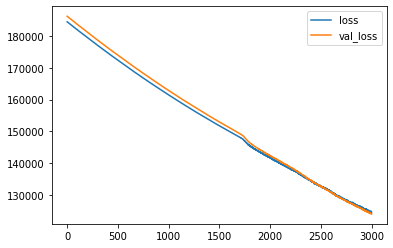

In [179]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [180]:
predictions = model.predict(X_test)

In [181]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:',metrics.explained_variance_score(y_test,predictions))

MAE: 232.78538876870522
MSE: 124141.50277569781
RMSE: 352.3372003857921
R^2: 0.13296381836485516


That went horribly. There was no 'elbow' cutoff either.

### Looking back at our initial column drops, it seems that some of the columns might've been more helpful

### I suggest redoing everything and consider the feature columns more carefully